## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [1]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [2]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from imageio import imread
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [14]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [15]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [16]:
img_path = "webcam_test_img.png"

if True or save_webcam_image(img_path) is False:
    # Webcam not active, use the coffee mug Image
    img_path = "coffee_mug.jpg"
    print("Using the Test Coffee Mug Image: {}".format(img_path))

Using the Test Coffee Mug Image: coffee_mug.jpg


D:\__Temp__\Trash\ipykernel_35752\1036286552.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(img_path))


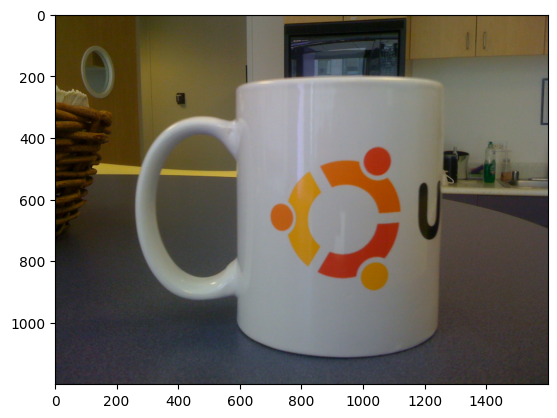

In [17]:
plt.imshow(imread(img_path))

## VGG16 - Pretrained Model

In [18]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [20]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 382ms/step


,Predicted Class,Name,Probability
0,n03063599,coffee_mug,0.785351
1,n07930864,cup,0.069750
2,n03063689,coffeepot,0.067270
3,n04398044,teapot,0.026774
4,n03950228,pitcher,0.020689
5,n04560804,water_jug,0.014152
6,n03733805,measuring_cup,0.002407
7,n04131690,saltshaker,0.002195
8,n07932039,eggnog,0.002176
9,n07920052,espresso,0.002121


## Resnet50 - Pretrained Model

In [21]:
# Define a Resnet model and print the model summary (follow the same procedure as in VGGNet)

# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16

In [22]:
# Predict Results